In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import imageio.v2 as imageio

![](Batch_Perceptron_Algorithm.png)

In [9]:
# TODO: Generate a set of data points in dimension d that is realizable by a perceptron algorithm (seperable by a line/plane of d-1 dimensions with )

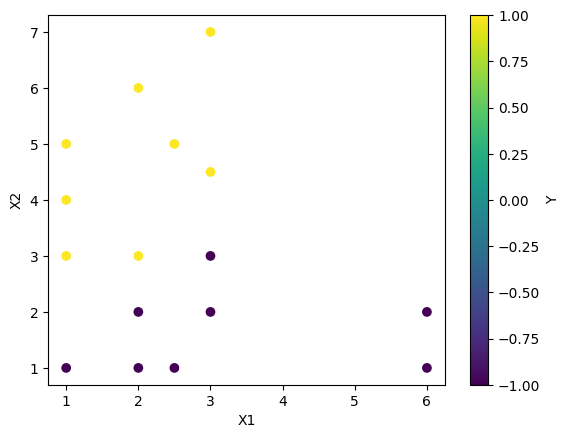

In [10]:
# Read in separable dataset in 2 dimensions
dim2_realizable = pd.read_csv('dim2_test.csv')

plt.scatter(dim2_realizable['X1'], dim2_realizable['X2'], c=dim2_realizable['Y'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Y')
plt.show()

In [11]:
# Convert to list of tuples: (np.array([X1, X2]), np.array([Y]))
sample_data = [(np.array([row.X1, row.X2]), np.array([row.Y])) for _, row in dim2_realizable.iterrows()]

In [ ]:
def plot_halfspace_2D(sample_data, weights, mistake_index):
    # Extract Xs
    X = np.array([x for x, y in sample_data])

    # Get min and max for each dimension
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # Optional: pad the limits a bit for visual clarity
    padding = 0.5
    x1_lim = (x1_min - padding, x1_max + padding)
    x2_lim = (x2_min - padding, x2_max + padding)

    # Generalized x range from data
    x_vals = np.linspace(x1_min - padding, x1_max + padding, 200)

    y_vals = -weights[0]/weights[1] * x_vals


    plt.clf() # clear figure
    plt.xlim(x1_lim)
    plt.ylim(x2_lim)
    plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')
    plt.scatter(dim2_realizable['X1'], dim2_realizable['X2'], c=dim2_realizable['Y'], cmap='viridis')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Y')
    plt.title("Perceptron Decision Boundary in X1–X2 Plane")
    plt.grid(True)
    plt.legend()

    # Save plot with mistake number as index
    plt.savefig("process_pngs/image{i}.png".format(i=mistake_index))


In [17]:
def run_perceptron(sample_data, max_epochs=100, shuffle=True):
    # Init weight vector
    w_t = np.zeros(np.shape(sample_data[0][0])[0])

    mistake_index = 0

    for epoch in range(max_epochs):
        if epoch % 10 == 0:
            print(f"Epoch: {epoch}")

        if shuffle:
            random.shuffle(sample_data)  # Avoid fixed update paths

        no_mistakes = True
        
        # Init count vector to know if all samples were correct -> return weight vector
        # Check if there exists a sample i that is mislabeled (mistake bound algorithm)
        # Assume one batch here, so just iterate over samples and 
        for x_i, y_i in sample_data:
            # Dot product checks how aligned the weight vector (half space divider) is with the sample x_i
            if y_i * np.dot(w_t, x_i) <= 0:
                # Update weight vector in correct decision
                w_t += y_i*x_i
                no_mistakes = False  # A mistake was made
                mistake_index += 1

                plot_halfspace_2D(sample_data, w_t, mistake_index)

        if no_mistakes:
            plot_halfspace_2D(sample_data, w_t, mistake_index)
            print(f"Converged after {epoch + 1} epochs")
            break  # Stop if all predictions were correct


    # If all are correct (realizable assumption)
    return w_t

Epoch: 0
Converged after 5 epochs


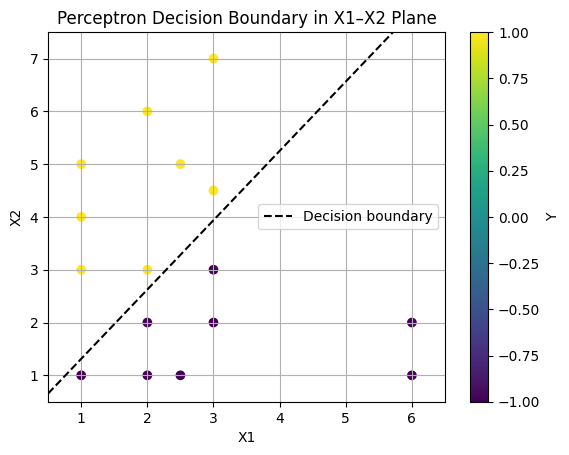

In [18]:
weights = run_perceptron(sample_data)

In [19]:
print("Final weights:", weights)

Final weights: [-10.5   8. ]


In [41]:
# Animate mistake frames of perceptron update
import os
from os import listdir
png_dir = 'process_pngs'
png_files = sorted(
    [f for f in listdir(png_dir) if f.endswith('.png')],
    key=lambda x: int(''.join(filter(str.isdigit, x)))  # sort by mistake_index
)

# Read images
ims = [imageio.imread(os.path.join(png_dir, f)) for f in png_files]
imageio.mimwrite('perceptron_animation.gif', ims, duration = 60, fps = 0.5)

In [ ]:
# TODO: Generalize plotting to 3-dim and plane as learning bound
# TODO: Generalize data generation to n-dimensions - inversion 
# TODO: Highlight the data point that's being used for mistake update
# TODO: Draw orthogonal vector in the "update" direction